In [3]:
import numpy as np
import matplotlib.pyplot as plt

First, check out Gezerlis's code below, which implements the forward difference and central difference method if you are given the close form of the function f(x), so that you can actually evaluate the function f(x) at any x.

In [2]:
# Author: Alex Gezerlis
# Numerical Methods in Physics with Python (2nd ed., CUP, 2023)
from math import exp, sin, cos, log10

def f(x):
    return exp(sin(2*x))

def fprime(x):
    return 2*exp(sin(2*x))*cos(2*x)

def calc_fd(f,x,h):
    fd = (f(x+h) - f(x))/h
    return fd

def calc_cd(f,x,h):
    cd = (f(x+h/2) - f(x-h/2))/h
    return cd

x = 0.5
an = fprime(x)

hs = [10**(-i) for i in range(1,12)]
fds = [abs(calc_fd(f,x,h) - an) for h in hs]
cds = [abs(calc_cd(f,x,h) - an) for h in hs]

rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
print("h     abs. error in fd   abs. error in cd")
for h,fd,cd in zip(hs,fds,cds):
    print(rowf.format(h,fd,cd))


h     abs. error in fd   abs. error in cd
1e-01 0.3077044583376249 0.0134656094697734
1e-02 0.0260359156900742 0.0001350472493096
1e-03 0.0025550421497806 0.0000013505120728
1e-04 0.0002550180941236 0.0000000135077878
1e-05 0.0000254969542519 0.0000000001495843
1e-06 0.0000025492660578 0.0000000002500959
1e-07 0.0000002564334673 0.0000000011382744
1e-08 0.0000000189018428 0.0000000189018428
1e-09 0.0000003741732106 0.0000000699159992
1e-10 0.0000021505300500 0.0000021505300500
1e-11 0.0000332367747395 0.0000111721462455


Now, let's have the situation where you got sampled data (say, for example, it's the output of your function generator), so that h is essentially something that you should have set to begin with when you gathered the data. Remember: you got this from a function gen.

Text(0, 0.5, 'cos(x)')

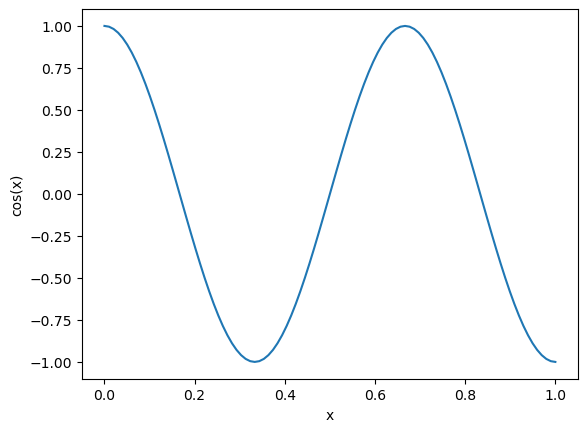

In [31]:
numpoints = 100
xmin = 0 
xmax = 1
freq = 1.5
h = (xmax - xmin)
x = np.linspace(xmin, xmax, numpoints)
y = np.cos(2*np.pi*freq*x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('cos(x)')

In [32]:
y_forward = np.roll(y, shift=-1)
y_backward = np.roll(y, shift=1)
h = x[1] - x[0]

In [33]:
yprime_cd = (y_forward - y_backward)/(2*h)
yprime_fd = (y_forward - y)/h
yprime_bd = (y - y_backward)/h

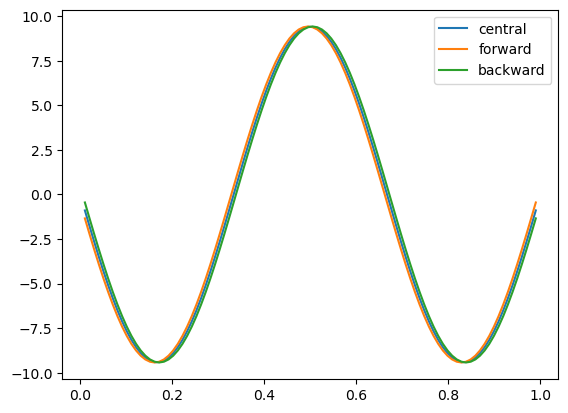

In [34]:
plt.plot(x[1:-1], yprime_cd[1:-1], x[1:-1], yprime_fd[1:-1], x[1:-1], yprime_bd[1:-1])
legends = ['central', 'forward', 'backward']
plt.legend(legends)